In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# case definition
from study import V27, neutral
from trajectory import Trajectory

# Clean up trajectories
1. remove outliers
2. interpolate to fill missing data
3. apply median filter to remove spikeyness

In [4]:
case = neutral(casedir='WAKEBENCH-NREL_DEBNATH_LES/neutral',
               prefix='NREL_DEBNATH_LES_20190325',
               turbine=V27)

In [5]:
# sampling plane
yrange = (-40,40)
zrange = (0.497933,80.5041)

In [6]:
wakedata = {
    '2D Gaussian': '2D_Gaussian',
    '1D Gaussian (Bastankhah)': '1D_Gaussian_Bastankhah',
    'Constant-area contours': 'Constant-Area_Contours',
}

In [7]:
traj = {}
for name,outdir in wakedata.items():
    traj[name] = Trajectory(case,outdir)
    traj[name].filter(yrange,zrange,window=3)

WAKEBENCH-NREL_DEBNATH_LES/neutral/2D_Gaussian/trajectory_2D.csv
WAKEBENCH-NREL_DEBNATH_LES/neutral/2D_Gaussian/trajectory_3D.csv
WAKEBENCH-NREL_DEBNATH_LES/neutral/2D_Gaussian/trajectory_4D.csv
WAKEBENCH-NREL_DEBNATH_LES/neutral/2D_Gaussian/trajectory_5D.csv
WAKEBENCH-NREL_DEBNATH_LES/neutral/2D_Gaussian/trajectory_6D.csv
WAKEBENCH-NREL_DEBNATH_LES/neutral/2D_Gaussian/trajectory_7D.csv
WAKEBENCH-NREL_DEBNATH_LES/neutral/2D_Gaussian/trajectory_8D.csv
x= 54.0 outliers in y/z : 0 0
x= 81.0 outliers in y/z : 8 1
x= 108.0 outliers in y/z : 16 2
x= 135.0 outliers in y/z : 47 9
x= 162.0 outliers in y/z : 103 24
x= 189.0 outliers in y/z : 165 53
x= 216.0 outliers in y/z : 264 96
WAKEBENCH-NREL_DEBNATH_LES/neutral/1D_Gaussian_Bastankhah/trajectory_2D.csv
WAKEBENCH-NREL_DEBNATH_LES/neutral/1D_Gaussian_Bastankhah/trajectory_3D.csv
WAKEBENCH-NREL_DEBNATH_LES/neutral/1D_Gaussian_Bastankhah/trajectory_4D.csv
WAKEBENCH-NREL_DEBNATH_LES/neutral/1D_Gaussian_Bastankhah/trajectory_5D.csv
WAKEBENCH-NREL_

## check result

In [8]:
wakedir = 'y'

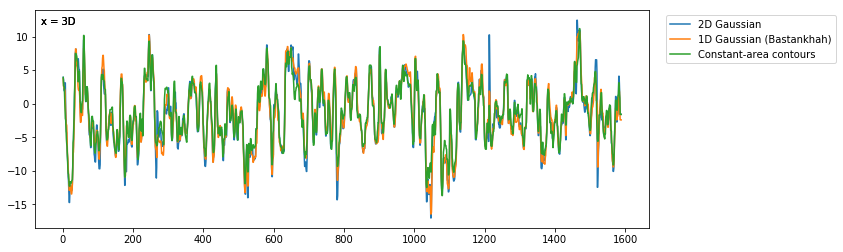

In [9]:
downD = 3.0
fig,ax = plt.subplots(figsize=(11,4))
for name in wakedata.keys():
    traj[name].plot_wake_hist(wakedir,downD,fig=fig,ax=ax,label=name)
ax.legend(loc='upper left',bbox_to_anchor=(1.02,1))

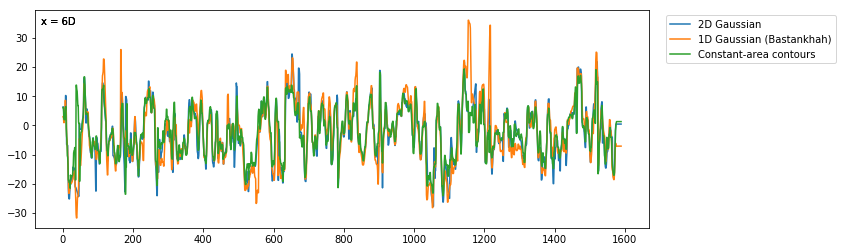

In [10]:
downD = 6.0
fig,ax = plt.subplots(figsize=(11,4))
for name in wakedata.keys():
    traj[name].plot_wake_hist(wakedir,downD,fig=fig,ax=ax,label=name)
ax.legend(loc='upper left',bbox_to_anchor=(1.02,1))

## output filtered trajectories

In [11]:
for name in wakedata.keys():
    traj[name].write_trajectory_files()

WAKEBENCH-NREL_DEBNATH_LES/neutral/2D_Gaussian--filtered/trajectory_2D.csv
updated 1589 / 1591 at x= 54.0
WAKEBENCH-NREL_DEBNATH_LES/neutral/2D_Gaussian--filtered/trajectory_3D.csv
updated 1586 / 1587 at x= 81.0
WAKEBENCH-NREL_DEBNATH_LES/neutral/2D_Gaussian--filtered/trajectory_4D.csv
updated 1583 / 1584 at x= 108.0
WAKEBENCH-NREL_DEBNATH_LES/neutral/2D_Gaussian--filtered/trajectory_5D.csv
updated 1580 / 1581 at x= 135.0
WAKEBENCH-NREL_DEBNATH_LES/neutral/2D_Gaussian--filtered/trajectory_6D.csv
updated 1577 / 1578 at x= 162.0
WAKEBENCH-NREL_DEBNATH_LES/neutral/2D_Gaussian--filtered/trajectory_7D.csv
updated 1574 / 1575 at x= 189.0
WAKEBENCH-NREL_DEBNATH_LES/neutral/2D_Gaussian--filtered/trajectory_8D.csv
updated 1571 / 1572 at x= 216.0
WAKEBENCH-NREL_DEBNATH_LES/neutral/1D_Gaussian_Bastankhah--filtered/trajectory_2D.csv
updated 1589 / 1591 at x= 54.0
WAKEBENCH-NREL_DEBNATH_LES/neutral/1D_Gaussian_Bastankhah--filtered/trajectory_3D.csv
updated 1586 / 1587 at x= 81.0
WAKEBENCH-NREL_DEBN

In [12]:
blerg

NameError: name 'blerg' is not defined

## sanity check

In [ ]:
before,after = {},{}
for name,outdir in wakedata.items():
    before[name] = Trajectory(case,outdir)
    after[name] = Trajectory(case,outdir+'--filtered')

In [ ]:
for name in wakedata.keys():
    fig,ax = before[name].plot_wake_hist(wakedir,color='0.5')
    after[name].plot_wake_hist(wakedir,fig=fig,ax=ax,label=name)